In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import json
import datetime

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/My Drive/ufo sightings/pre-processed.csv")
df.head()

,id,city,country,shape,duration (seconds),latitude,longitude,time_of_day,am/pm,hr,min,year,date,month,dayofweek,reported after (days)
0,0,san marcos,us,cylinder,2700.0,29.883056,-97.941111,evening/night,pm,8,30,1949,10,10,1,19923
1,1,lackland afb,us,light,7200.0,29.384210,-98.581082,evening/night,pm,9,0,1949,10,10,1,20521
2,2,chester,gb,circle,20.0,53.200000,-2.916667,afternoon,pm,5,0,1955,10,10,1,19096
3,3,edna,us,circle,20.0,28.978333,-96.645833,evening/night,pm,9,0,1956,10,10,3,17265
4,4,kaneohe,us,light,900.0,21.418056,-157.803611,evening/night,pm,8,0,1960,10,10,1,15809


In [6]:
df.columns

Index(['id', 'city', 'country', 'shape', 'duration (seconds)', 'latitude',
       'longitude', 'time_of_day', 'am/pm', 'hr', 'min', 'year', 'date',
       'month', 'dayofweek', 'reported after (days)'],
      dtype='object')

**Suprisingly one might think that midnights i.e 12am - 6am (after dark) would be more popular than afternoons but afternoon sightings are almost the same which is surprising because its daytime!**

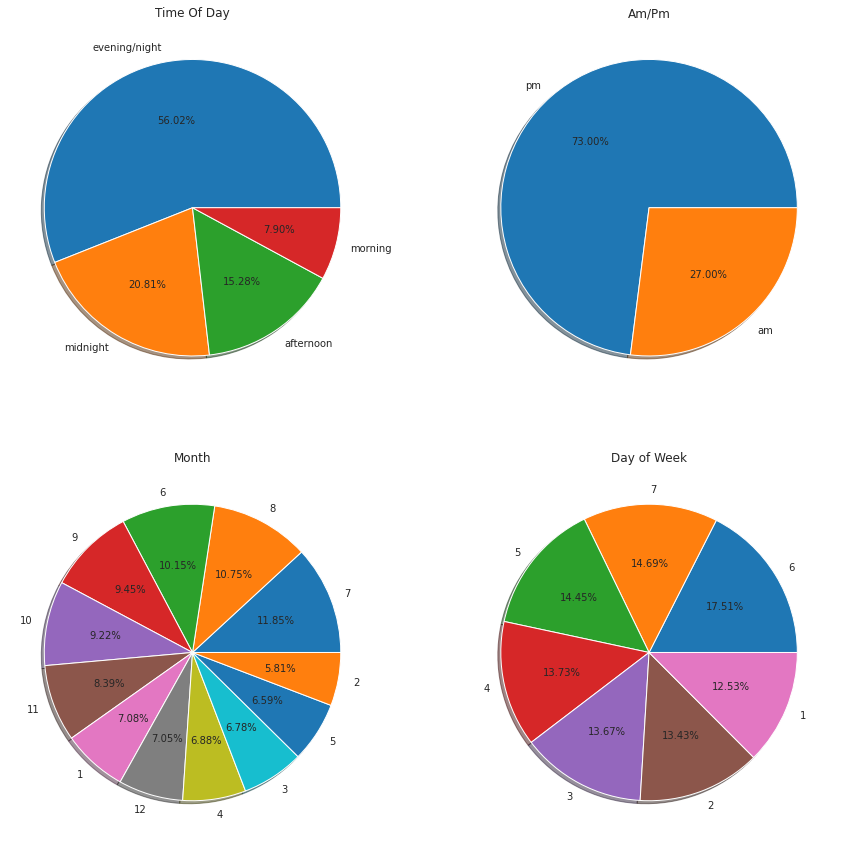

In [7]:
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(15, 15))

tod = df["time_of_day"].value_counts().to_dict().keys()
tod_val = df["time_of_day"].value_counts().to_dict().values()
ax[0][0].pie(tod_val, labels=tod, autopct='%1.2f%%',shadow=True)
ax[0][0].set_title("Time Of Day")

tod = df["am/pm"].value_counts().to_dict().keys()
tod_val = df["am/pm"].value_counts().to_dict().values()
ax[0][1].pie(tod_val, labels=tod, autopct='%1.2f%%',shadow=True)
ax[0][1].set_title("Am/Pm")

tod = df["month"].value_counts().to_dict().keys()
tod_val = df["month"].value_counts().to_dict().values()
ax[1][0].pie(tod_val, labels=tod, autopct='%1.2f%%',shadow=True)
ax[1][0].set_title("Month")

tod = df["dayofweek"].value_counts().to_dict().keys()
tod_val = df["dayofweek"].value_counts().to_dict().values()
ax[1][1].pie(tod_val, labels=tod, autopct='%1.2f%%',shadow=True)
ax[1][1].set_title("Day of Week")

plt.show()

- In morning which hrs are more popular
- In afternoon which hrs are more popular
- In night/eve which hrs are more popular
- In midnight which hrs are more popular

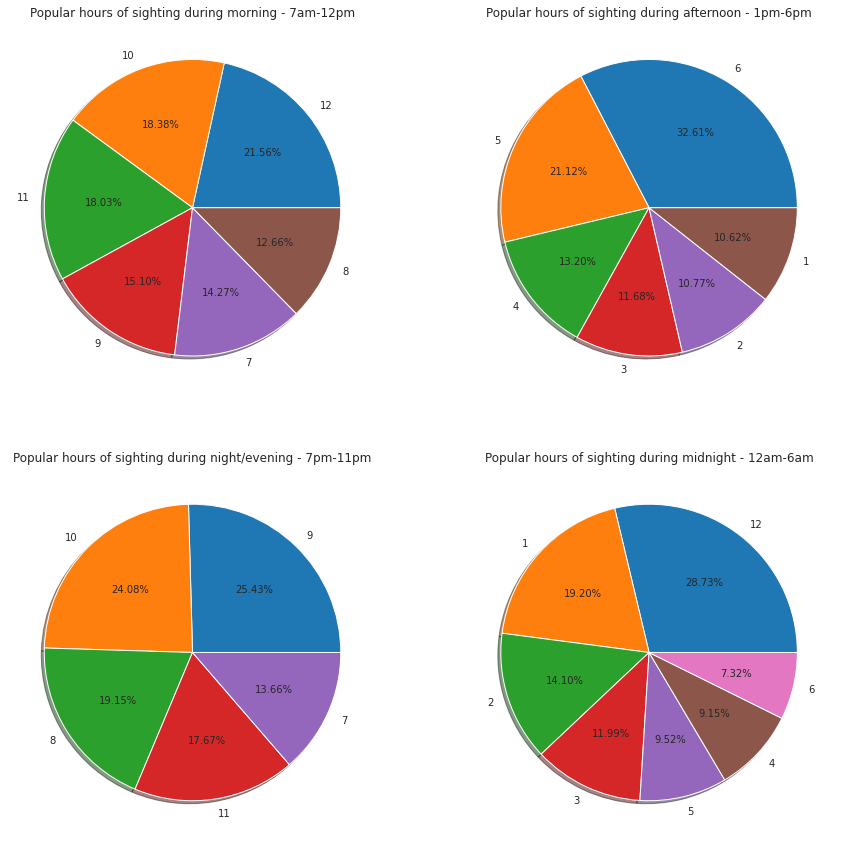

In [ ]:
morn = df[df["time_of_day"]=="morning"]
aftrn = df[df["time_of_day"]=="afternoon"]
niteeve = df[df["time_of_day"]=="evening/night"]
midnite = df[df["time_of_day"]=="midnight"]

fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(15, 15))

tod = morn["hr"].value_counts().to_dict().keys()
tod_val = morn["hr"].value_counts().to_dict().values()
ax[0][0].pie(tod_val, labels=tod, autopct='%1.2f%%',shadow=True)
ax[0][0].set_title("Popular hours of sighting during morning - 7am-12pm")

tod = aftrn["hr"].value_counts().to_dict().keys()
tod_val = aftrn["hr"].value_counts().to_dict().values()
ax[0][1].pie(tod_val, labels=tod, autopct='%1.2f%%',shadow=True)
ax[0][1].set_title("Popular hours of sighting during afternoon - 1pm-6pm")

tod = niteeve["hr"].value_counts().to_dict().keys()
tod_val = niteeve["hr"].value_counts().to_dict().values()
ax[1][0].pie(tod_val, labels=tod, autopct='%1.2f%%',shadow=True)
ax[1][0].set_title("Popular hours of sighting during night/evening - 7pm-11pm")

tod = midnite["hr"].value_counts().to_dict().keys()
tod_val = midnite["hr"].value_counts().to_dict().values()
ax[1][1].pie(tod_val, labels=tod, autopct='%1.2f%%',shadow=True)
ax[1][1].set_title("Popular hours of sighting during midnight - 12am-6am")

plt.show()

**We also saw this in pie chart above that every month has almost similar ufo appearences. We cannot say if certain months are more popular or not**

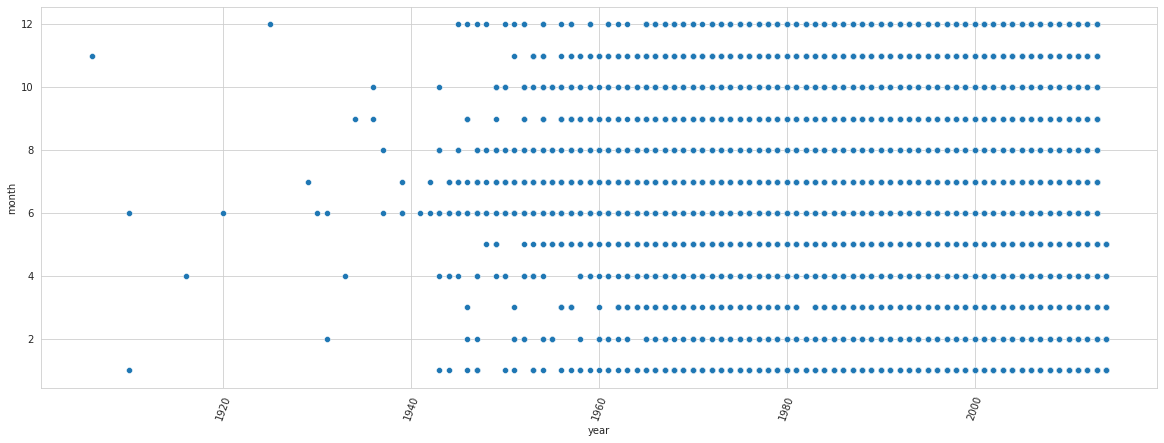

In [8]:
fig, ax = plt.subplots(figsize=(20,7))
plt.xticks(rotation=70)
sns.scatterplot(x="year",y="month",data=df)
plt.show()

**But we can certainly say that appearences occur mostly at evening/midnight i.e 6pm-12am**

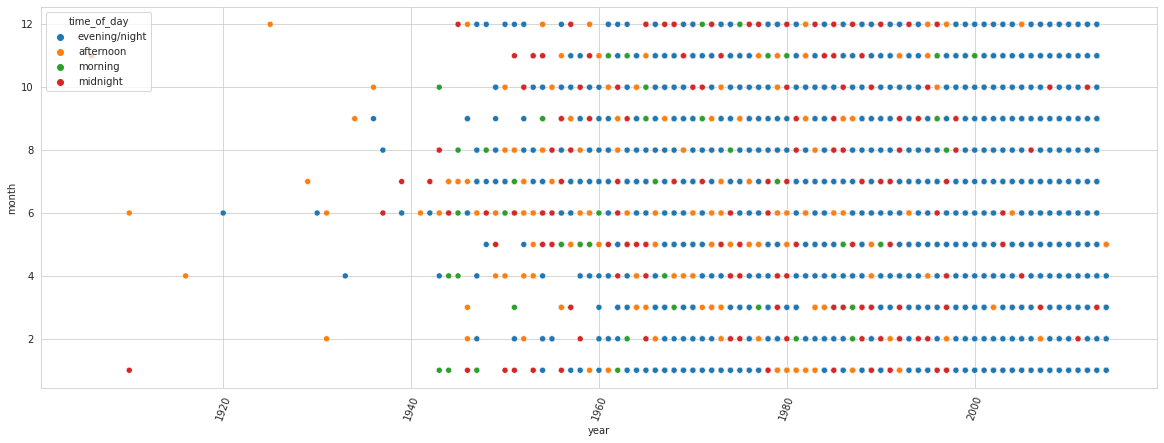

In [9]:
fig, ax = plt.subplots(figsize=(20,7))
plt.xticks(rotation=70)
sns.scatterplot(x="year",y="month",data=df,hue="time_of_day")
plt.show()

**Months which are more popular, hue with dayofweek**

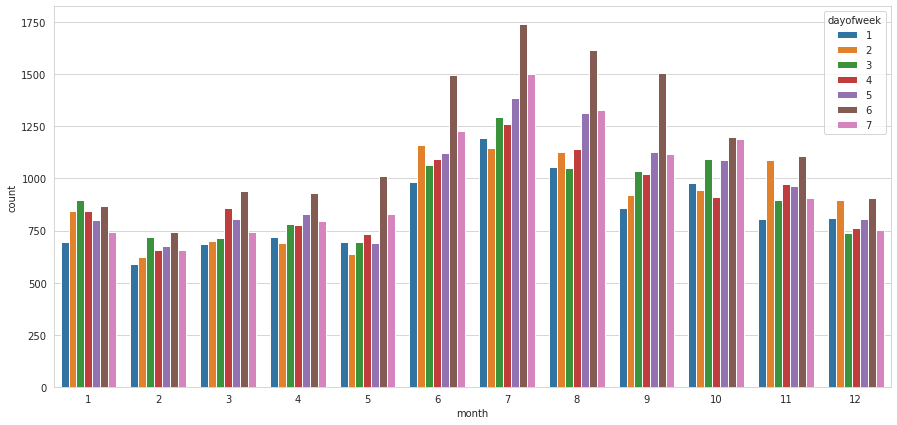

In [15]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x="month",data=df,hue="dayofweek")

**Months which are more popular, hue with timeofday**

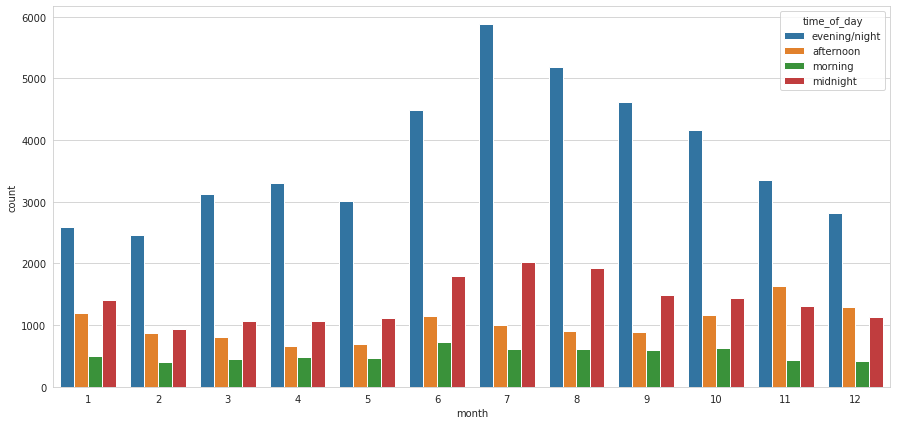

In [16]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x="month",data=df,hue="time_of_day")

**Geo Plotting**<br>
- It will not be viable to plot all 80k records on the map and also it wouldnt be readable, Hence lets just plot 5k records to get an idea.
- Run all the 3 cells below to create and download the map. Map will be downloaded in HTML format which you can open in the browser for yourself to play around with it.
- You can map.html in the root directory

# Continued on Tableau:
# https://public.tableau.com/profile/sunaal.dua#!/vizhome/Ufosightings-insights/sheet1

In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
# def timeofsight(date,month,year,timeofday,timeofweek,hr,min,ampm):
#   html="""<p style="font-family:roboto;font-size:15px;color:red">
#   <b>"""+date+""" """+month+""","""+year+"""</b>
#   <br>"""+timeofday+"""
#   <br>"""+timeofweek+""", """+hr+""":"""+min+""" """+ampm+"""</p>"""
#   iframe = folium.IFrame(html=html, width=140, height=75)
#   return iframe

# def sightingsperday(time,shape,country,count):
#   html="""<table style="width:100%;border:5px solid black;">
#   <tr>
#     <td style="font-family:roboto;font-size:15px;background-color:#212F3C;color:white"><b>Country</b></td>
#     <td style="font-family:roboto;font-size:15px;background-color:#1A5276;color:white">"""+country+"""</td>
#   </tr>
#   <tr>
#     <td style="font-family:roboto;font-size:15px;background-color:#212F3C;color:white"><b>Sightings</b></td>
#     <td style="font-family:roboto;font-size:15px;background-color:#1A5276;color:white">"""+count+""" sightings</td>
#   </tr>
#   <tr>
#     <td style="font-family:roboto;font-size:15px;background-color:#212F3C;color:white"><b>Duration</b></td>
#     <td style="font-family:roboto;font-size:15px;background-color:#1A5276;color:white">"""+time+""" sec(s)</td>
#   </tr>
#   <tr>
#     <td style="font-family:roboto;font-size:15px;background-color:#212F3C;color:white"><b>Shape</b></td>
#     <td style="font-family:roboto;font-size:15px;background-color:#1A5276;color:white">"""+shape+"""</td>
#   </tr>
# </table>"""
#   iframe = folium.IFrame(html=html, width=250, height=120)
#   return iframe

In [ ]:
# cty_dict = df["city"].value_counts().to_dict()
# day_ow = {1:"Mon",2:"Tues",3:"Wed",4:"Thurs",5:"Fri",6:"Sat",7:"Sun"}
# mnt = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"June",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

# map1 = folium.Map(location=[49.430332, 20.630154],tiles='Stamen Toner',zoom_start=2,position="absolute")
# mc1 = MarkerCluster(name="No. of sightings per city",show=False)
# mc2 = MarkerCluster(name="Time of sightings",show=False)

# zipped_col = zip(df["date"][:5000],df["month"][:5000],df["year"][:5000],df["time_of_day"][:5000],df["dayofweek"][:5000],df["shape"][:5000],df["hr"][:5000],df["min"][:5000],df["am/pm"][:5000],df["latitude"][:5000],df["longitude"][:5000],df["country"][:5000],df["city"][:5000],df["duration (seconds)"][:5000])
# for dt,mnth,yr,tod,tow,shape,hr,min,ampm,lat,lon,cntry,cty,time in zipped_col:
  
#   cnt = cty_dict[cty]
#   if((cnt>=1) and (cnt<=100)):
#     clr="#8FD305"
#   elif((cnt>100) and (cnt<=200)):
#     clr="#ECED08"
#   elif((cnt>200) and (cnt<=300)):
#     clr="#EDA208"
#   elif((cnt>300) and (cnt<=400)):
#     clr="#ED6208"
#   else:
#     clr="#FB0606"

#   if(tod=="morning"):
#     clr2="pink"
#     ic="fa-sun-o"
#   elif(tod=="afternoon"):
#     clr2="pink"
#     ic="fa-sun-o"
#   elif(tod=="evening/night"):
#     clr2="darkpurple"
#     ic="fa-moon-o"
#   else:
#     clr2="darkpurple"
#     ic="fa-moon-o"

#   if(min==0):
#     mn="00"
#   else:
#     mn=min

#   folium.Circle(
#       radius=20000,
#       location=[lat, lon],
#       popup=folium.Popup(sightingsperday(str(time),shape,cntry,str(cnt))),
#       color=clr,
#       tooltip=cty+" ("+cntry+"), "+str(cnt)+" sighting(s)",
#       fill=True,
#   ).add_to(mc1)

#   folium.Marker(
#     location=[lat, lon],
#     popup=folium.Popup(timeofsight(str(dt),mnt[mnth],str(yr),tod,day_ow[tow],str(hr),str(mn),ampm)),
#     tooltip=day_ow[tow]+", "+str(hr)+":"+str(mn)+" "+ampm,
#     icon=folium.Icon(color=clr2, icon=ic,prefix="fa")
#   ).add_to(mc2)

In [ ]:
# map1.add_child(mc1)
# map1.add_child(mc2)
# map1.add_child(folium.LayerControl())
# map1.save("/content/drive/My Drive/Colab Notebooks/ufo sightings/map1.html")